In [18]:
using DifferentialEquations
using LaTeXStrings
using Plots

In [19]:
tspan = (0.0, 20.0);
ϵ = 0.1;
a = 1.0;

In [20]:
function prob2!(dv, v, p, t)
    u = v[1]
    du = v[2]
    dv[1] = du
    dv[2] = -u - ϵ*u^2
end

prob2! (generic function with 1 method)

In [21]:
u0 = [a, 0]
prob = ODEProblem(prob2!, u0, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8);

$$u(t)=a \cos (\omega t)-\frac{\varepsilon a^2}{2}+\frac{\varepsilon a^2}{6} \cos (2 \omega t)$$

In [22]:
approx(t) = a*cos(t)-ϵ*(a^2/2)+ϵ*(a^2/6)*cos(2*t);
tvals = LinRange(tspan[1], tspan[2], 1000);

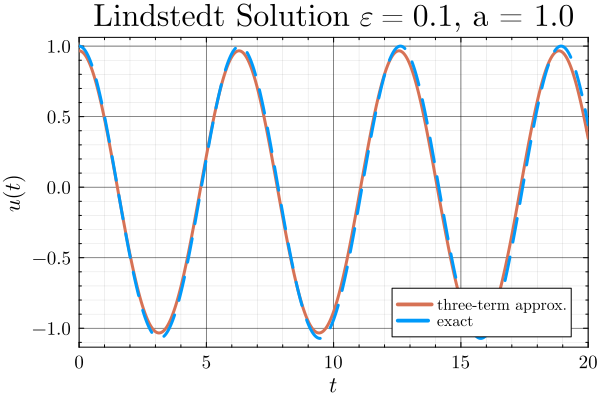

In [23]:
theme(:dao::Symbol)

plot(tvals, approx.(tvals), 
    label="three-term approx.", 
    line=(3, :solid),
    )
plot!(sol, 
    idxs=[1],
    line=(3, :dash),
    label="exact",
    title=L"Lindstedt Solution $\varepsilon = $"*"$ϵ, "*"a = "*"$a",
    xlabel=L"$t$",
    ylabel=L"$u(t)$",
    legend=:best,
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,)
# savefig("Aero_HW4_Prob2.pdf")

In [24]:
numerical_sol = [s[1] for s in sol.(tvals)];
difference = (numerical_sol .- approx.(tvals));

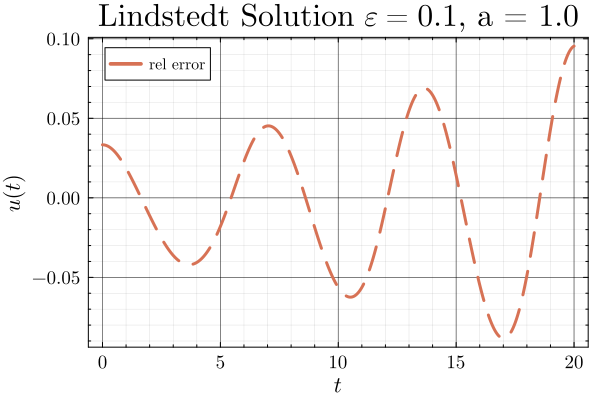

In [25]:
plot(tvals, difference,
    line=(3, :dash),
    label="rel error",
    title=L"Lindstedt Solution $\varepsilon = $"*"$ϵ, "*"a = "*"$a",
    xlabel=L"$t$",
    ylabel=L"$u(t)$",
    legend=:best,
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,)